# Molecule Selector — Dropdown for Population Diagrams

A `Dropdown` widget lets you switch the active molecule in a `PopulationDiagramPlot`. The plot class's `set_molecule()` method handles clearing and redrawing automatically.

In [4]:
# First, add the iSLAT package to the Python path
import sys
from pathlib import Path

# Navigate from notebook location to the iSLATTests directory (where iSLAT package lives)
notebook_dir = Path.cwd()
islat_root = notebook_dir.parent.parent.parent  # Interactive Widgets -> Notebooks -> Examples -> iSLAT
if str(islat_root) not in sys.path:
    sys.path.insert(0, str(islat_root))

# Core libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Use the interactive widget backend for matplotlib
%matplotlib widget

# IPython widget libraries
import ipywidgets as widgets
from IPython.display import display, clear_output

# iSLAT data types
from iSLAT.Modules.DataTypes import Molecule, MoleculeDict

# iSLAT standalone plot classes
from iSLAT.Modules.Plotting import (
    BasePlot,
    DEFAULT_THEME,
    LineInspectionPlot,
    PopulationDiagramPlot,
    FullSpectrumPlot,
    MainPlotGrid,
)

print("Imports successful!")
print(f"matplotlib backend: {matplotlib.get_backend()}")

Imports successful!
matplotlib backend: widget


In [5]:
# --- Load observed data and define a molecule factory ---
import pandas as pd

# Load CI Tau MIRI spectrum (Banzatti+2023b)
data_path = Path(islat_root) / "iSLAT" / "DATAFILES" / "EXAMPLE-data" / "CITau_MIRI_Banzatti+2023b.csv"
obs = pd.read_csv(data_path)

wave_grid     = obs["wave"].values
observed_flux = obs["flux"].values
observed_err  = obs["err"].values
continuum     = obs["cont"].values

print(f"Loaded: {data_path.name}")
print(f"  {len(wave_grid)} points, {wave_grid.min():.2f}–{wave_grid.max():.2f} μm")

# Paths to HITRAN parameter files
data_dir = Path(islat_root) / "iSLAT" / "DATAFILES" / "HITRANdata"
water_par_file = str(data_dir / "data_Hitran_H2O.par")
co_par_file    = str(data_dir / "data_Hitran_CO.par")
co2_par_file   = str(data_dir / "data_Hitran_CO2.par")

# Wavelength range derived from observed data
wavelength_range = (float(wave_grid.min()), float(wave_grid.max()))

# Default molecule definitions (shared across all sections)
DEFAULT_MOLECULES = {
    "H2O": {"Molecule Name": "H2O", "temp": 850, "n_mol": 1e18, "radius": 0.5, "color": "#0000FF",
             "displaylabel": "$H_2O$", "File Path": water_par_file},
    "CO":  {"Molecule Name": "CO",  "temp": 1000, "n_mol": 1e18, "radius": 0.4, "color": "#FF0000",
             "displaylabel": "CO",  "File Path": co_par_file},
    "CO2": {"Molecule Name": "CO2", "temp": 300,  "n_mol": 1e17, "radius": 0.5, "color": "green",
             "displaylabel": "$CO_2$", "File Path": co2_par_file},
}

def create_mol_dict():
    """
    Create a fresh, independent MoleculeDict with the default molecules.
    """
    md = MoleculeDict(
        global_distance=160,
        global_stellar_rv=0.0,
        global_wavelength_range=wavelength_range,
        global_model_pixel_res=0.0013,
    )
    md.load_molecules(
        molecules_data=[v for v in DEFAULT_MOLECULES.values()],
        initial_molecule_parameters=DEFAULT_MOLECULES,
    )
    md.bulk_update_parameters({"fwhm": 130, "broad": 1})
    return md

# Quick sanity check
_test = create_mol_dict()
print(f"create_mol_dict() → {list(_test.keys())}")
del _test

Loaded: CITau_MIRI_Banzatti+2023b.csv
  10672 points, 4.90–28.72 μm
Deferring intensity calculations for 3 molecules
create_mol_dict() → ['H2O', 'CO', 'CO2']


Deferring intensity calculations for 3 molecules
Calculating intensity for H2O: T=850.0K, N_mol=1.00e+18, dv=1.0


Dropdown(description='Molecule:', options=('H2O', 'CO', 'CO2'), style=DescriptionStyle(description_width='80px…

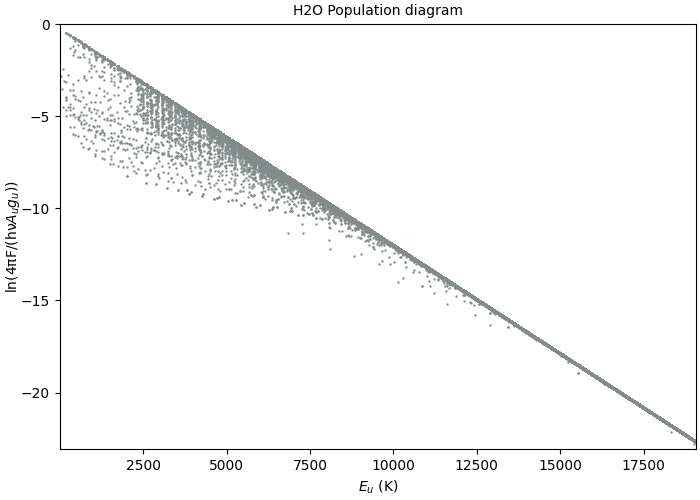

In [6]:
# --- Dropdown molecule selector for PopulationDiagramPlot ---

mol_dict_3 = create_mol_dict()

pdp = PopulationDiagramPlot(
    molecule=mol_dict_3["H2O"],
    figsize=(7, 5),
)
pdp.generate_plot()

# Build dropdown options: display label -> molecule key
mol_dropdown = widgets.Dropdown(
    options=list(mol_dict_3.keys()),
    value="H2O",
    description='Molecule:',
    style={'description_width': '80px'},
)

def on_molecule_change(change):
    """Switch the molecule shown in the population diagram."""
    mol_name = change['new']
    pdp.set_molecule(mol_dict_3[mol_name])
    pdp.fig.canvas.draw_idle()

mol_dropdown.observe(on_molecule_change, names='value')

display(mol_dropdown)
pdp.show()